K 521.0007309586913
Nb 101
av=1.01e+02,intrinsic=True
mean 9.0136855394


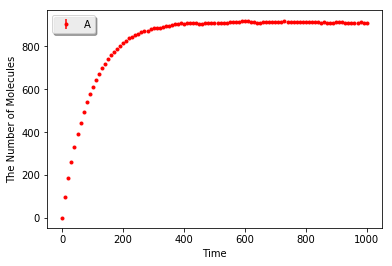

In [1]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=70#200#0#0
duration = 1000
D=0.1
nproc=70
L=cbrt(100)
k0= 0.1
keff=0.02
method='multiprocessing'
Mean=[]
Ks=[]
Cb = 1
rlist=[0.005]#,0.03,0.02]#,0.01]

for rm in rlist:
    K=2.**(-5./6)*L/rm
    print('K',K)
    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        V = L**3 
        #M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 
        Nb =int(Cb*V)
        print('Nb',Nb)
        assert(Nb>0)
        with species_attributes():
            A | {'D': D, 'radius':rm}
            B | {'D': D, 'radius':rm}

        with reaction_rules():
            ~A > A | k0
            A + B >B | keff
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        #print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':Nb},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,y0={'B':Nb},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        data2 = np.array(obs.data()).T
        meana=np.mean(data2[1][90:])
        print('mean',meana/V)
        Mean.append(meana/V)
        return obs

    obs2=singlerun('spa',True,simrun)
    Ks.append(K)
    viz.plot_number_observer(obs2,'r.')#,obs1,'k-')
    #obs3=singlerun('egfrd',True,simrun)
    #obs4=singlerun('gillespie',False,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas5'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas5_10k'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas5_10k'.format(rm),obs3)

[6.0232700657087559, 5.3931726795616077]
[130.25018273967282, 52.10007309586912]


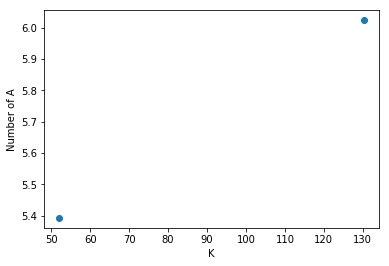

In [8]:
print(Mean)
print(Ks)
plt.plot(Ks,Mean,'o')
plt.xlabel('K')
plt.ylabel('Number of A')

In [9]:
2**(1./6) /10

0.11224620483093731

In [10]:
0.02/0.1/0.11

1.8181818181818181

In [11]:
0.02*10/0.11

1.8181818181818183

In [12]:
L=1.
rm=0.02
spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)

1.1295606565386387

In [22]:
0.1*(10**3 -1)/(0.1+0.02)

832.5

In [10]:
L=cbrt(100.)
rm=0.005
print(2.**(-5./6)*L/rm)

521.0007309586913
